In [1]:
import pandas as pd
import numpy as np
import ast
import collections as c
import matplotlib.pyplot as plt
import scipy.stats as st

%matplotlib inline

In [2]:
convs=pd.read_csv('../data/bbAllFullConvosAW.csv',sep=';')

/home/mako0970/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (38,39,40,42,43,44,46,47,48,50,51,52,54,55,56,58,59,60,62,63,64,66,67,68,70,71,72,74,75,76,78,79,80,82,83,84,86,87,88,90,91,92,94,95,96,98,99,100,102,103,104,106,107,108,110,111,112,114,115,116,118,119,120,122,123,124,126,127,128,130,131,132,134,135,136,138,139,140,142,143,144,146,147,148,150,151,152,154,155,156,158,159,160,162,163,164,166,167,168,170,171,172) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
len(convs)

5357

In [4]:
convs['convoLen']=(pd.to_datetime(convs.convoEndTime)-pd.to_datetime(convs.date0)).apply(lambda x: x.item()/(10**9))

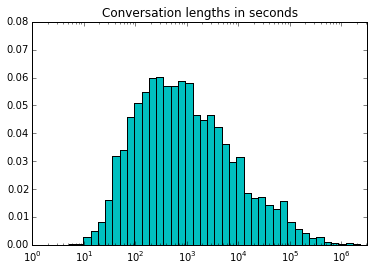

In [5]:
convoLen = convs.convoLen.dropna().tolist()
bins=np.logspace(0, int(np.log(max(convoLen))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(convoLen,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Conversation lengths in seconds')

In [6]:
np.median(convoLen)

732.0

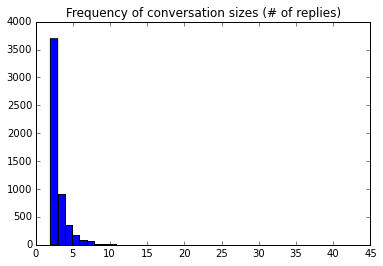

In [7]:
plt.hist(convs.convSize,42)
plt.title('Frequency of conversation sizes (# of replies)')

In [8]:
np.median(convs.convSize)

2.0

In [9]:
np.percentile(convs.convSize, 90)

4.0

In [10]:
convs.allNames=convs.allNames.apply(lambda x: ast.literal_eval(x))

In [11]:
convs['userSetLen']=convs.allNames.apply(lambda x: len(x))

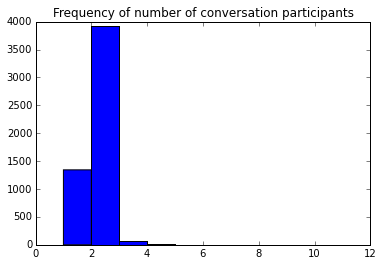

In [12]:
plt.hist(convs.userSetLen,10)
plt.title('Frequency of number of conversation participants')

In [13]:
np.median(convs.userSetLen)

2.0

In [14]:
np.percentile(convs.userSetLen, 90)

2.0

In [15]:
max(convs.userSetLen)

11

### Average time between successive replies whithin a conversation

In [16]:
convs['avgTimePerReply']=convs.convoLen/(convs.convSize-1)

convs.convoLen/(convs.convSize-1) makes it more consistent w/ **repSecDiff** in bbInterReplyTimingAnalysis

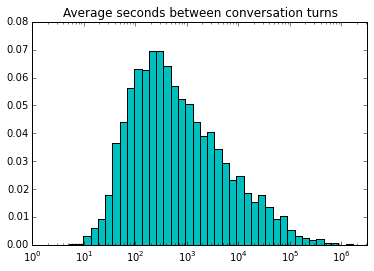

In [17]:
avgTime=convs.avgTimePerReply.dropna().tolist()
bins=np.logspace(0, int(np.log(max(avgTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(avgTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Average seconds between conversation turns')

In [18]:
np.median(avgTime)

480.0

In [19]:
before=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-10-15 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-10-25 00:00:00'))]

In [20]:
during=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-10-25 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-04 00:00:00'))]

In [21]:
after=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-11-04 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-14 00:00:00'))]

In [22]:
lafter=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-11-14 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-24 00:00:00'))]

In [23]:
len(before)

815

In [24]:
len(during)

2069

In [25]:
len(after)

1450

In [26]:
len(lafter)

957

In [27]:
len(before)+len(during)+len(after)+len(lafter)

5291

66 conversations don't fit these time periods - span more than one

# Before

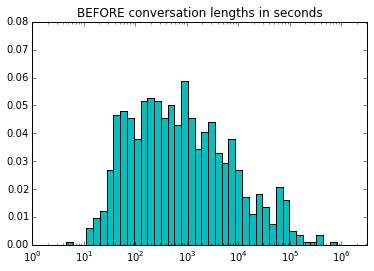

In [28]:
bConvoLen=before.convoLen.dropna().tolist()
bins=np.logspace(0, int(np.log(max(bConvoLen))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(bConvoLen,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title(('BEFORE conversation lengths in seconds'))

In [29]:
np.median(bConvoLen)

650.0

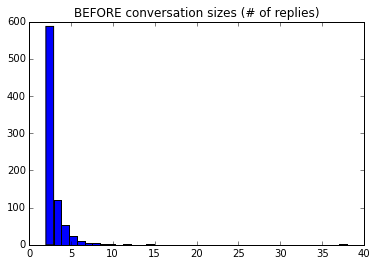

In [30]:
plt.hist(before.convSize.tolist(),39)
plt.title('BEFORE conversation sizes (# of replies)')

In [31]:
np.median(before.convSize)

2.0

In [32]:
np.percentile(before.convSize, 90)

4.0

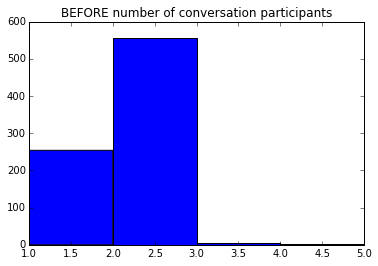

In [33]:
plt.hist(before.userSetLen.tolist(),4)
plt.title('BEFORE number of conversation participants')

In [34]:
np.median(before.userSetLen)

2.0

In [35]:
np.percentile(before.userSetLen, 90)

2.0

In [36]:
max(before.userSetLen)

5

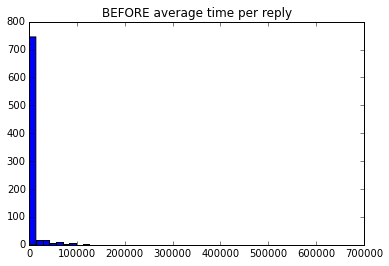

In [37]:
plt.hist(before.avgTimePerReply.tolist(), 50)
plt.title('BEFORE average time per reply')

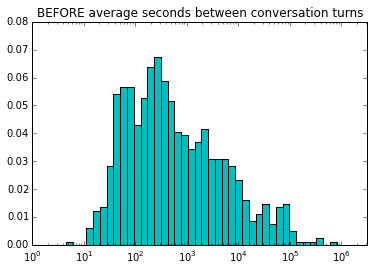

In [38]:
bAvgRepTime=before.avgTimePerReply.dropna().tolist()
bins=np.logspace(0, int(np.log(max(bAvgRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(bAvgRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('BEFORE average seconds between conversation turns')

Or should it plot on the loglog? Checked it - not interesting, not high enough

In [39]:
np.median(bAvgRepTime)

388.0

# During

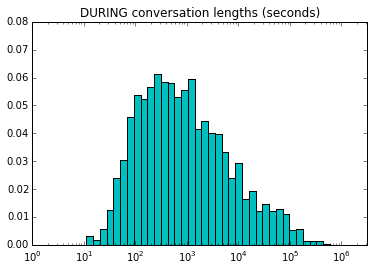

In [40]:
dConvoLen=during.convoLen.dropna().tolist()
bins=np.logspace(0, int(np.log(max(dConvoLen))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(dConvoLen,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('DURING conversation lengths (seconds)')

In [41]:
np.median(dConvoLen)

701.0

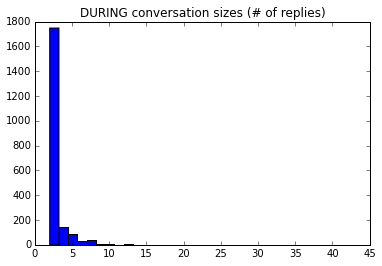

In [42]:
plt.hist(during.convSize.tolist(),33)
plt.title('DURING conversation sizes (# of replies)')

In [43]:
np.median(during.convSize)

2.0

In [44]:
np.percentile(during.convSize, 90)

4.0

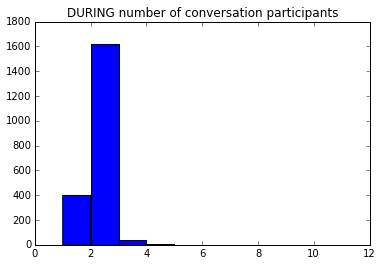

In [45]:
plt.hist(during.userSetLen.tolist(),10)
plt.title('DURING number of conversation participants')

In [46]:
np.median(during.userSetLen)

2.0

In [47]:
np.percentile(during.userSetLen,90)

2.0

In [48]:
max(during.userSetLen)

11

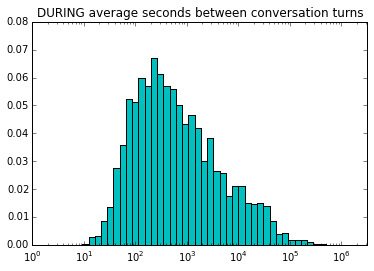

In [49]:
dAvgRepTime=during.avgTimePerReply.dropna().tolist()
bins=np.logspace(0, int(np.log(max(dAvgRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(dAvgRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('DURING average seconds between conversation turns')

In [50]:
np.median(dAvgRepTime)

466.0

Represent the medians for the convoLen and avgReplyTime as boxplots? This is local only, include both local and global?

# After

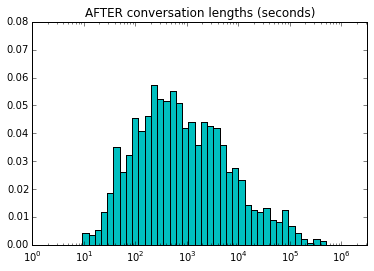

In [51]:
aConvoLen=after.convoLen.dropna().tolist()
bins=np.logspace(0, int(np.log(max(aConvoLen))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(aConvoLen,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('AFTER conversation lengths (seconds)')

In [52]:
np.median(aConvoLen)

664.5

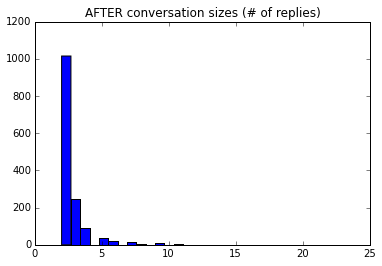

In [53]:
plt.hist(after.convSize.tolist(),33)
plt.title('AFTER conversation sizes (# of replies)')

In [54]:
np.median(after.convSize.tolist())

2.0

In [55]:
np.percentile(after.convSize, 90)

4.0

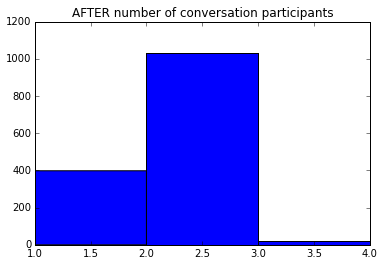

In [57]:
plt.hist(after.userSetLen.tolist(),3)
plt.title('AFTER number of conversation participants')

In [56]:
np.median(after.userSetLen)

2.0

In [57]:
np.percentile(after.userSetLen, 90)

2.0

In [58]:
max(after.userSetLen)

4

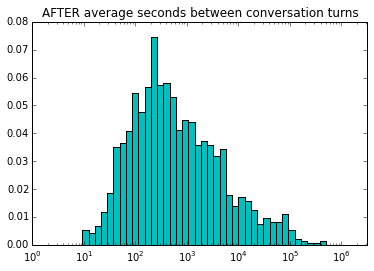

In [59]:
aAvgRepTime=after.avgTimePerReply.dropna().tolist()
bins=np.logspace(0, int(np.log(max(aAvgRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(aAvgRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('AFTER average seconds between conversation turns')

In [60]:
np.median(aAvgRepTime)

451.60000000000002

# Long after

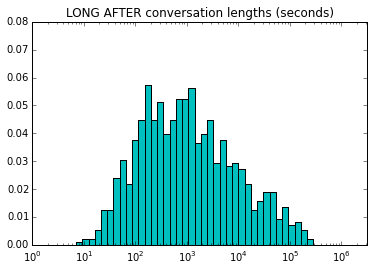

In [61]:
laConvoLen=lafter.convoLen.dropna().tolist()
bins=np.logspace(0, int(np.log(max(laConvoLen))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(laConvoLen,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('LONG AFTER conversation lengths (seconds)')

In [62]:
np.median(laConvoLen)

870.0

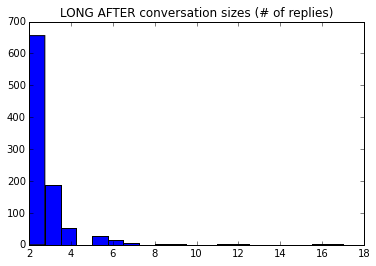

In [63]:
plt.hist(lafter.convSize.tolist() ,20)
plt.title('LONG AFTER conversation sizes (# of replies)')

In [64]:
np.median(after.convSize.tolist())

2.0

In [65]:
np.percentile(after.convSize, 90)

4.0

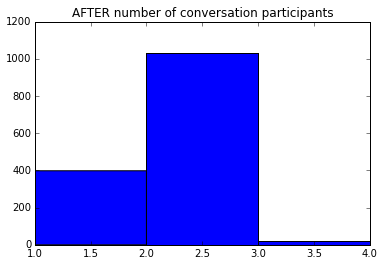

In [66]:
plt.hist(after.userSetLen.tolist(),3)
plt.title('AFTER number of conversation participants')

In [67]:
np.median(after.userSetLen)

2.0

In [68]:
np.percentile(after.userSetLen, 90)

2.0

In [69]:
max(after.userSetLen)

4

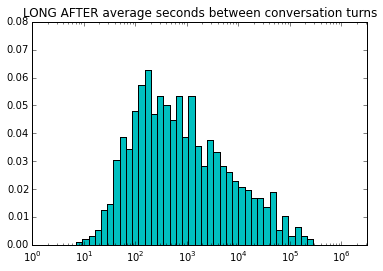

In [70]:
laAvgRepTime=lafter.avgTimePerReply.dropna().tolist()
bins=np.logspace(0, int(np.log(max(laAvgRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(laAvgRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('LONG AFTER average seconds between conversation turns')

In [71]:
np.median(laAvgRepTime)

589.0

In [72]:
st.kruskal(bConvoLen,dConvoLen,aConvoLen,laConvoLen)

(10.532123288973974, 0.014544562238407815)

In [74]:
st.ranksums(bConvoLen,dConvoLen)

(-1.7189133703627555, 0.085630147212499799)

In [75]:
st.ranksums(bConvoLen,laConvoLen)

(-2.9705411503409764, 0.0029727557571398136)

In [76]:
st.ranksums(dConvoLen, laConvoLen)

(-2.0563410448254626, 0.039749654629156417)

In [73]:
st.kruskal(bAvgRepTime,dAvgRepTime,aAvgRepTime,laAvgRepTime)

(10.803510039016027, 0.012837233001296385)

**Important points:**
* the medians of average between-reply times w/in conversations are higher than median of inter-reply times in general
* this is because inter-reply times distrbiution is quite skewed and long-tailed, so averaging icorporates more of those bigger values
* the question is then: are inter-reply times w/in each conversation also skewed and long-tailed? Or does each conversation has a somehwat consistent temporal rhythm/signature?
* to investigate this, calculate the  median, sd, and range of inter-reply time
* for the branching conversations, only do that for consequitive segments
* Not stat sig

# Further within conversation analysis

In [77]:
convs['longTailed']=0 

In [78]:
#made-up: max - median (2nd 50% of dist) is more than twice the median (1st 50% of dist)
def longTailed(row):
    timeDiff=[]
    for i in range(1,44): #start from one b/c subtracting the previous tweet's time
        colName='date'+str(i)
        if str(row[colName])!='0':
            if ((pd.to_datetime(row[colName])>pd.to_datetime(row['date'+str(i-1)]))):#for branching convos!!!!
                t=(pd.to_datetime(row[colName])-pd.to_datetime(row['date'+str(i-1)])).seconds
                timeDiff.append(t)
    return np.median(timeDiff) < 2*(max(timeDiff)-np.median(timeDiff))

In [79]:
convs['longTailed']=convs.apply(longTailed, axis=1)

In [80]:
sum(convs.longTailed)/float(len(convs))

0.21392570468545827

In [81]:
before=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-10-15 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-10-25 00:00:00'))]

In [82]:
during=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-10-25 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-04 00:00:00'))]

In [83]:
after=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-11-04 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-14 00:00:00'))]

In [84]:
lafter=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-11-14 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-24 00:00:00'))]

In [85]:
sum(before.longTailed)/float(len(before))

0.18773006134969325

In [86]:
sum(during.longTailed)/float(len(during))

0.22667955534074433

In [87]:
sum(after.longTailed)/float(len(after))

0.20137931034482759

In [88]:
sum(lafter.longTailed)/float(len(lafter))

0.21525600835945663

**Takeway:**
* so there is no differnce DO CHI-SQUARE
* that means that the difference in average inter-reply time is not because more convos during have long-tailed dists
* this must mean that during all the tweets in the convos are longer (both short and very long reply times)

In [89]:
convs['medianReplyTime']=0

In [90]:
def medRep(row):
    timeDiff=[]
    for i in range(1,44): #start from one b/c subtracting the previous tweet's time
        colName='date'+str(i)
        if str(row[colName])!='0':
            if ((pd.to_datetime(row[colName])>pd.to_datetime(row['date'+str(i-1)]))):#for branching convos!!!!
                t=(pd.to_datetime(row[colName])-pd.to_datetime(row['date'+str(i-1)])).seconds
                timeDiff.append(t)
    return np.median(timeDiff)

In [91]:
convs['medianReplyTime']=convs.apply(medRep, axis=1)

In [92]:
np.median(convs.medianReplyTime)

442.0

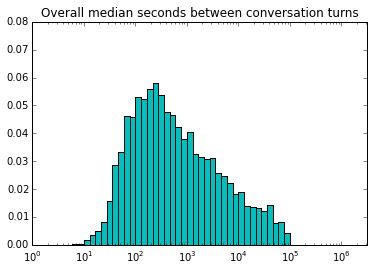

In [93]:
medRepTime=convs.medianReplyTime.dropna().tolist()
bins=np.logspace(0, int(np.log(max(medRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(medRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Overall median seconds between conversation turns')

In [94]:
before=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-10-15 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-10-25 00:00:00'))]

In [95]:
during=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-10-25 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-04 00:00:00'))]

In [96]:
after=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-11-04 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-14 00:00:00'))]

In [97]:
lafter=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-11-14 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-24 00:00:00'))]

In [98]:
np.median(before.medianReplyTime)

370.0

In [99]:
np.median(during.medianReplyTime)

427.0

In [100]:
np.median(after.medianReplyTime)

411.0

In [101]:
np.median(lafter.medianReplyTime)

524.5

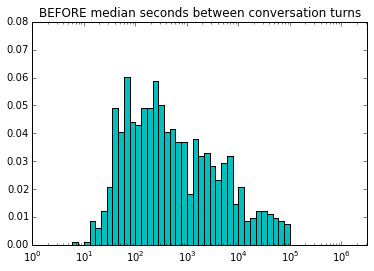

In [102]:
bMedRepTime=before.medianReplyTime.dropna().tolist()
bins=np.logspace(0, int(np.log(max(bMedRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(bMedRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('BEFORE median seconds between conversation turns')

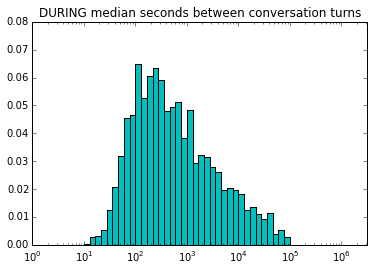

In [103]:
dMedRepTime=during.medianReplyTime.dropna().tolist()
bins=np.logspace(0, int(np.log(max(dMedRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(dMedRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('DURING median seconds between conversation turns')

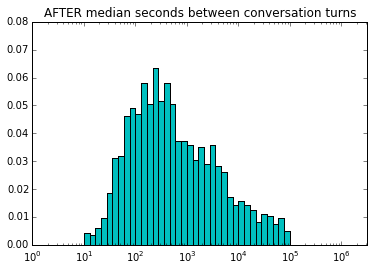

In [104]:
aMedRepTime=after.medianReplyTime.dropna().tolist()
bins=np.logspace(0, int(np.log(max(aMedRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(aMedRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('AFTER median seconds between conversation turns')

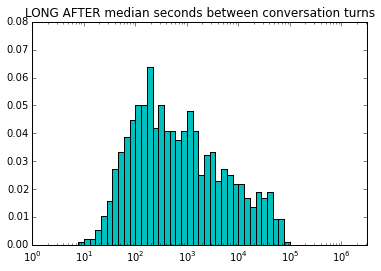

In [105]:
laMedRepTime=lafter.medianReplyTime.dropna().tolist()
bins=np.logspace(0, int(np.log(max(laMedRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(laMedRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('LONG AFTER median seconds between conversation turns')

In [106]:
st.kruskal(bMedRepTime,dMedRepTime,aMedRepTime,laMedRepTime)

(10.027424540546178, 0.018334449523551864)

In [107]:
st.ranksums(bMedRepTime,dMedRepTime)

(-1.5675812494278873, 0.11697889087132976)

In [108]:
st.ranksums(bMedRepTime,laMedRepTime)

(-2.858570049075321, 0.0042555513986657651)

In [109]:
st.ranksums(dMedRepTime, laMedRepTime)

(-2.132206836204301, 0.032989846727718965)

# Branching

In [110]:
sum(convs.branching)/float(len(convs))

0.059921597909277584

In [111]:
sum(before.branching)/float(len(before))

0.039263803680981597

In [112]:
sum(during.branching)/float(len(during))

0.068632189463508936

In [113]:
sum(after.branching)/float(len(after))

0.060689655172413794

In [114]:
sum(lafter.branching)/float(len(lafter))

0.048066875653082548

**Takeway:**
* So there are slightly more branching conversations during and after than before and lafter
* Is this because more people are involved? NO!!!
* We show above that in all time periods median number of people in convos is 2
* Although during has a higher maximum # of users in a convo (5, 11, 4 respectively)

In [115]:
convs.to_csv('../data/bbAllFullConvosAW.csv',sep=';', index=False)